# Training with augmented datasets
To test the effectiveness of the augmentation let's train our model on with a smaller starting set of images and use augmentation to increase it. We will compare it to 1000 images without augmentation.


In [1]:
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import (
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift, img_to_array, ImageDataGenerator)
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding



Using TensorFlow backend.


Let's define our model architecture

In [2]:
def getModel():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
    model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation='relu'))
    model.add(MaxPool2D(strides=(2,2)))
    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
    model.add(MaxPool2D(strides=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-3), metrics=["accuracy"])
    
    
    return model
print(getModel().summary())

W1022 18:03:43.013227 13064 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1022 18:03:43.065688 13064 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 18:03:43.074252 13064 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1022 18:03:43.163654 13064 deprecation_wrapper.py:119] From C:\Users\jdeha\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1022 18:03:43.391737 13064 depreca

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

Let's define an image data generator for augmenting our data set with various transforms

In [3]:
gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='constant',
        cval=0
)

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train_image_aug = x_train[1:100]
y_train_image_aug = y_train[1:100]
x_test_image_aug = x_test[1:100]
y_test_image_aug = y_test[1:100]
x_train_orig = x_train[1:1000]
y_train_orig = y_train[1:1000]
x_test_orig = x_test[1:1000]
y_test_orig = y_test[1:1000]


test_data_img_aug = np.asarray(x_test_image_aug / 255.0 , dtype=float)
train_data_img_aug = np.asarray(x_train_image_aug / 255.0 , dtype=float)
test_labels_img_aug = np.asarray(y_test_image_aug , dtype=np.int32)
train_labels_img_aug = np.asarray(y_train_image_aug , dtype=np.int32)

test_data_orig = np.asarray(x_test_orig / 255.0 , dtype=float)
train_data_orig = np.asarray(x_train_orig / 255.0 , dtype=float)
test_labels_orig = np.asarray(y_test_orig , dtype=np.int32)
train_labels_orig = np.asarray(y_train_orig , dtype=np.int32)

Let's train our model using our image augmentation set up

In [40]:
y_train_labels_img_aug = to_categorical(train_labels_img_aug)
y_test_labels_img_aug = to_categorical(test_labels_img_aug)
x_train_data_img_aug = train_data_img_aug.reshape(-1, 28, 28, 1)
x_test_data_img_aug = test_data_img_aug.reshape(-1, 28, 28, 1)

train_gen = gen.flow(x_train_data_img_aug, 
                        y_train_labels_img_aug, 
                        batch_size=10,
                        seed=42)

model = getModel()

history = model.fit_generator(
            train_gen,
            steps_per_epoch=100,
            epochs=30,
            verbose=1,
            validation_data=(x_test_data_img_aug, y_test_labels_img_aug),
            shuffle=True
)

Epoch 1/30
100/100 [==============================] - 5s 49ms/step - loss: 1.5732 - acc: 0.4290 - val_loss: 1.6024 - val_acc: 0.5152
Epoch 2/30
100/100 [==============================] - 2s 25ms/step - loss: 0.7595 - acc: 0.7060 - val_loss: 1.8263 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 3s 25ms/step - loss: 0.6156 - acc: 0.7632 - val_loss: 2.3624 - val_acc: 0.5960
Epoch 4/30
100/100 [==============================] - 2s 24ms/step - loss: 0.5855 - acc: 0.7654 - val_loss: 2.1115 - val_acc: 0.5859
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 0.5804 - acc: 0.7822 - val_loss: 2.2742 - val_acc: 0.5960
Epoch 6/30
100/100 [==============================] - 2s 24ms/step - loss: 0.4454 - acc: 0.8036 - val_loss: 1.9665 - val_acc: 0.5859
Epoch 7/30
100/100 [==============================] - 3s 25ms/step - loss: 0.4184 - acc: 0.8361 - val_loss: 2.0949 - val_acc: 0.6263
Epoch 8/30
100/100 [==============================] - 2s 24ms/step - 

Let's now train the model without image augmentation

In [41]:
y_train_labels_orig = to_categorical(train_labels_orig)
y_test_labels_orig = to_categorical(test_labels_orig)
x_train_data_orig = train_data_orig.reshape(-1, 28, 28, 1)
x_test_data_orig = test_data_orig.reshape(-1, 28, 28, 1)

training_history = model.fit(x_train_data_orig,
                     y_train_labels_orig,
                     epochs=30,
                     verbose=1,
                     batch_size=32,
                     validation_data=(x_test_data_orig, y_test_labels_orig),
                     shuffle=True
                )

Train on 999 samples, validate on 999 samples
Epoch 1/30
999/999 [==============================] - 2s 2ms/step - loss: 1.1046 - acc: 0.7497 - val_loss: 0.8231 - val_acc: 0.7377
Epoch 2/30
999/999 [==============================] - 2s 2ms/step - loss: 0.5723 - acc: 0.8058 - val_loss: 0.7277 - val_acc: 0.7487
Epoch 3/30
999/999 [==============================] - 2s 2ms/step - loss: 0.4747 - acc: 0.8328 - val_loss: 0.6859 - val_acc: 0.7568
Epoch 4/30
999/999 [==============================] - 2s 2ms/step - loss: 0.3804 - acc: 0.8739 - val_loss: 0.6740 - val_acc: 0.7728
Epoch 5/30
999/999 [==============================] - 2s 2ms/step - loss: 0.3518 - acc: 0.8749 - val_loss: 0.6810 - val_acc: 0.7758
Epoch 6/30
999/999 [==============================] - 2s 2ms/step - loss: 0.2946 - acc: 0.8959 - val_loss: 0.6722 - val_acc: 0.7748
Epoch 7/30
999/999 [==============================] - 2s 2ms/step - loss: 0.2607 - acc: 0.9139 - val_loss: 0.6735 - val_acc: 0.7828
Epoch 8/30
999/999 [==========

Let's now see how they compare

(0.0, 1.09)

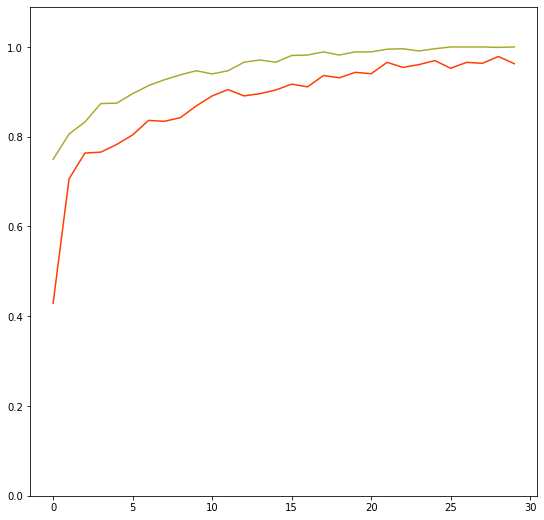

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,9))
 
subplot = figure.add_subplot(1, 2, 1)

plt.plot(training_history.history['acc'], color='#aaaa30', label='Image augmentation')

plt.plot(history.history['acc'], color='#ff3d00', label='Image augmentation')
plt.ylim(0.0,1.09)